<h4 style="text-align: center;">Instituto Federal de Educação, Ciência e Tecnologia de Minas Gerais - IFMG<br>Especialização em Inteligência Artificial - EiA<br>Python para Ciência de Dados<br>Prof.: Rodrigo Silva<br>Aluno: Fernando dos Santos Alves Fernandes</h4>

# Trabalho Prático

### Aplicação de Ciência de Dados para um problema de regressão ou de classificação, com pelo menos duas fontes de dados (***Deadline: 10/07/2023***).

## 1. Carregamento das fontes de dados:

### Importando os principais módulos Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


### Base de dados Global Landslide Catalog (Fonte: https://www.kaggle.com/datasets/sathyanarayanrao89/global-landslide-catalog)

O Catálogo Global de Deslizamentos (GLC) é uma base de dados com eventos de deslizamentos desencadeados por chuvas do mundo todo e considera todos os tipos de movimentos de massa desencadeados por chuvas. Como informações principais, podem ser encontrados: a data do evento (*event_date*), o fator desencadeador (*landslide_trigger*), o tamanho do deslizamento (*landslide_size*), o número de vidas perdidas (*fatality_count*), o país em que o evento ocorreu (*country_name*), a descrição do local em que o evento ocorreu (*location_description*), entre outros atributos.
Para este trabalho, foram selecionados apenas dados do Brasil e os principais atributos de interesse.

A seguir, realiza-se o carregamento da base de dados GLC e um filtro é realizado, para obtenção dos dados relativos ao Brasil.

In [3]:
landslide_data1 = pd.read_csv('https://raw.githubusercontent.com/especializacao-ia-ifmg-op/mod_2_python-for-data-science/main/datasets/glc.csv')
df1_BR = landslide_data1.loc[landslide_data1['country_name'].str.contains('Brazil') == True, ['landslide_category', 'landslide_trigger', 'landslide_size', 'event_date', 'fatality_count', 'location_description', 'location_region']]
df1_BR

,landslide_category,landslide_trigger,landslide_size,event_date,fatality_count,location_description,location_region
307,landslide,other,medium,2013,6,"Santana, Amapá",AP
308,mudslide,downpour,medium,2013,16,"Lajedinho, Bahia",BA
309,landslide,downpour,medium,2015,7,"Travessa Moreira, Marotinho",BA
310,landslide,downpour,medium,2015,7,"Barro Branco, Av. San Antonio",BA
311,landslide,continuous_rain,small,2015,1,"Ladera da Montanha, Salvador",BA
...,...,...,...,...,...,...,...
516,mudslide,downpour,medium,2010,3,"Francisco Morato, Sao Paulo",SP
517,landslide,downpour,medium,2010,2,"Maua and Santo Andrea, Sao Paulo suburb",SP
518,landslide,rain,medium,2007,3,"Guaratingueta, northern Sao Paulo",SP
519,mudslide,downpour,large,2011,13,Sao Paolo,SP


Nas células seguintes, vêem-se todos os atribuitos da base original e os atributos de interesse para os dados do Brasil, bem como os tipos de dados relacionados.

In [4]:
landslide_data1.columns

Index(['source_name', 'source_link', 'event_id', 'event_date', 'event_title',
       'event_description', 'location_description', 'location_accuracy',
       'landslide_category', 'landslide_trigger', 'landslide_size',
       'landslide_setting', 'fatality_count', 'injury_count',
       'event_import_id', 'country_name', 'country_code',
       'admin_division_name', 'location_region', 'submitted_date', 'longitude',
       'latitude'],
      dtype='object')

In [5]:
df1_BR.dtypes

landslide_category      object
landslide_trigger       object
landslide_size          object
event_date               int64
fatality_count           int64
location_description    object
location_region         object
dtype: object

In [6]:
df1_BR.describe()

,event_date,fatality_count
count,214.000000,214.000000
mean,2010.560748,8.144860
std,1.470700,41.975653
min,2007.000000,0.000000
25%,2010.000000,0.000000
50%,2010.000000,0.000000
75%,2011.000000,2.000000
max,2016.000000,424.000000


A seguir, são apresentados os estados do Brasil em que eventos de deslizamento foram registrados no GLC.

In [7]:
states_from_df1_BR = df1_BR['location_region'].unique()
states_from_df1_BR

array(['AP', 'BA', 'ES', 'MA', 'MG', 'PA', 'PR', 'PE', 'RJ', 'RN', 'RS',
       'SC', 'SP'], dtype=object)

In [8]:
states_from_df1_BR.size

13

Observa-se que foram registrados no Brasil deslizamentos entre os anos de 2007 e 2016. 

In [9]:
years_from_df1_BR = df1_BR['event_date'].unique()
years_from_df1_BR.sort()
years_from_df1_BR

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

### Base de dados de precipitação (Fonte: https://www.kaggle.com/datasets/fabiopotsch/precipitation-in-brazil)

Uma vez que os dados da base GLC estão relacionados a eventos de deslizamentos desencadeados pela chuva, uma base de precipitação no Brasil foi utilizada. A base de precipitação do link acima, apresenta um conjunto de dados do nível de chuva no Brasil, dividido por estados, num período aproximado de 10 anos (1998 a 2017).

In [10]:
precipitation = pd.read_csv('https://raw.githubusercontent.com/especializacao-ia-ifmg-op/mod_2_python-for-data-science/a89b7a1bda6a14be528164788fff63da107c2f67/datasets/precipitation.csv')
precipitation['year'] = pd.to_datetime(precipitation['date']).dt.year
precipitation

,state,date,precipitation,year
0,BA,31/01/1998,63.6,1998
1,BA,28/02/1998,55.6,1998
2,BA,31/03/1998,117.2,1998
3,BA,30/04/1998,206.0,1998
4,BA,31/05/1998,250.9,1998
...,...,...,...,...
5809,SC,31/07/2017,9.4,2017
5810,SC,31/08/2017,116.3,2017
5811,SC,30/09/2017,104.1,2017
5812,SC,31/10/2017,100.0,2017


In [11]:
precipitation.columns

Index(['state', 'date', 'precipitation', 'year'], dtype='object')

*Observação*: Para facilitar a fusão dos dados de precipitação com os dados de deslizamentos, criou-se a coluna 'year', com o ano do registro de precipitação. Em seguida, filtrou-se a base de dados de precipitação, desconsiderando-se o atributo 'date'.

In [12]:
precip = precipitation[['state', 'precipitation', 'year']]
precip

,state,precipitation,year
0,BA,63.6,1998
1,BA,55.6,1998
2,BA,117.2,1998
3,BA,206.0,1998
4,BA,250.9,1998
...,...,...,...
5809,SC,9.4,2017
5810,SC,116.3,2017
5811,SC,104.1,2017
5812,SC,100.0,2017


A seguir, vemos todos os estados para os quais há informações sobre os níveis de chuva.

In [13]:
states_from_precip = precip['state'].unique()
states_from_precip

array(['BA', 'RR', 'SE', 'AL', 'TO', 'GO', 'PI', 'MG', 'PR', 'MA', 'AP',
       'RJ', 'AC', 'AM', 'DF', 'PE', 'CE', 'PA', 'MT', 'PB', 'RS', 'RN',
       'SP', 'ES', 'SC'], dtype=object)

In [14]:
states_from_precip.size

25

In [15]:
print(states_from_df1_BR)
print(states_from_precip)

['AP' 'BA' 'ES' 'MA' 'MG' 'PA' 'PR' 'PE' 'RJ' 'RN' 'RS' 'SC' 'SP']
['BA' 'RR' 'SE' 'AL' 'TO' 'GO' 'PI' 'MG' 'PR' 'MA' 'AP' 'RJ' 'AC' 'AM'
 'DF' 'PE' 'CE' 'PA' 'MT' 'PB' 'RS' 'RN' 'SP' 'ES' 'SC']


*Obs.: * Talvez seja interessante filtrar a base de maneira que contemple apenas os estados para os quais se tem registros de deslizamentos.

In [16]:
years_from_precip = precip['year'].unique()
years_from_precip.sort()
years_from_precip

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])

In [17]:
years_from_precip.size

20

In [18]:
print(years_from_df1_BR)
print(years_from_precip)

[2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017]


*Obs.:* Talvez seja interessante filtrar a base de maneira que contemple apenas o período entre 2007 e 2016, uma vez que é o período para o qual se tem registros de deslizamentos.

In [19]:
#print(states_from_df1_BR)
#print(years_from_df1_BR)
print(f'Dados de precipitação do período entre {years_from_df1_BR[0]} e {years_from_df1_BR[-1]}, para os estados: {states_from_df1_BR}')
filtered_precip = precip.loc[(precip['state'].isin(states_from_df1_BR))&(precip['year'].isin(years_from_df1_BR))]
filtered_precip

Dados de precipitação do período entre 2007 e 2016, para os estados: ['AP' 'BA' 'ES' 'MA' 'MG' 'PA' 'PR' 'PE' 'RJ' 'RN' 'RS' 'SC' 'SP']


,state,precipitation,year
108,BA,20.0,2007
109,BA,282.6,2007
110,BA,86.8,2007
111,BA,143.2,2007
112,BA,211.2,2007
...,...,...,...
5798,SC,77.6,2016
5799,SC,112.9,2016
5800,SC,177.9,2016
5801,SC,47.4,2016


### Agrupando os dados de precipitação para obter os totais por ano.

Para facilitar o trabalho de fusão das duas bases (*global-landslide-catalog* e *precipitation-in-brazil*), os dados de precipitação foram agrupados por estado e por ano, obtendo-se a precipitação anual total por estado.

In [20]:
#gp = precip.groupby(by=['state', 'year'], as_index=False).sum()
gp = filtered_precip.groupby(by=['state', 'year'], as_index=False).sum()
gp

,state,year,precipitation
0,AP,2007,2695.3
1,AP,2008,2353.3
2,AP,2009,2508.0
3,AP,2010,2415.6
4,AP,2011,2557.7
...,...,...,...
125,SP,2012,1932.7
126,SP,2013,1391.3
127,SP,2014,1253.3
128,SP,2015,1896.8


## 2. Fusão das fontes de dados (merge e/ou join):

Na célula a seguir, realiza-se a fusão das duas bases (*global-landslide-catalog* e *precipitation-in-brazil*).

In [21]:
merged_df = df1_BR.merge(gp, left_on='location_region', right_on='state')
merged_df
#merged_df1.loc[(merged_df1['state'].str.contains('RJ') == True)&(merged_df1['event_date'] == 2010)&(merged_df1['year'] == 2010)].head(100)

,landslide_category,landslide_trigger,landslide_size,event_date,fatality_count,location_description,location_region,state,year,precipitation
0,landslide,other,medium,2013,6,"Santana, Amapá",AP,AP,2007,2695.3
1,landslide,other,medium,2013,6,"Santana, Amapá",AP,AP,2008,2353.3
2,landslide,other,medium,2013,6,"Santana, Amapá",AP,AP,2009,2508.0
3,landslide,other,medium,2013,6,"Santana, Amapá",AP,AP,2010,2415.6
4,landslide,other,medium,2013,6,"Santana, Amapá",AP,AP,2011,2557.7
...,...,...,...,...,...,...,...,...,...,...
2135,mudslide,downpour,medium,2011,2,"Maua, Sao Paulo",SP,SP,2012,1932.7
2136,mudslide,downpour,medium,2011,2,"Maua, Sao Paulo",SP,SP,2013,1391.3
2137,mudslide,downpour,medium,2011,2,"Maua, Sao Paulo",SP,SP,2014,1253.3
2138,mudslide,downpour,medium,2011,2,"Maua, Sao Paulo",SP,SP,2015,1896.8


*Observação* : Após a fusão dos dados, têm-se dois atributos com a mesma informação ('location_region' e 'state'). Por isso, decide-se remover a coluna 'location_region'.

In [22]:
merged_df = merged_df.drop('location_region',axis=1)
merged_df

,landslide_category,landslide_trigger,landslide_size,event_date,fatality_count,location_description,state,year,precipitation
0,landslide,other,medium,2013,6,"Santana, Amapá",AP,2007,2695.3
1,landslide,other,medium,2013,6,"Santana, Amapá",AP,2008,2353.3
2,landslide,other,medium,2013,6,"Santana, Amapá",AP,2009,2508.0
3,landslide,other,medium,2013,6,"Santana, Amapá",AP,2010,2415.6
4,landslide,other,medium,2013,6,"Santana, Amapá",AP,2011,2557.7
...,...,...,...,...,...,...,...,...,...
2135,mudslide,downpour,medium,2011,2,"Maua, Sao Paulo",SP,2012,1932.7
2136,mudslide,downpour,medium,2011,2,"Maua, Sao Paulo",SP,2013,1391.3
2137,mudslide,downpour,medium,2011,2,"Maua, Sao Paulo",SP,2014,1253.3
2138,mudslide,downpour,medium,2011,2,"Maua, Sao Paulo",SP,2015,1896.8


## 3. Análise descritiva dos dados (Média, Máx., Mín.):

A seguir, segue uma análise exploratória e descritiva dos dados, a fim de se obter informações a respeito dos atributos e de suas relações.

In [23]:
merged_df.dtypes

landslide_category       object
landslide_trigger        object
landslide_size           object
event_date                int64
fatality_count            int64
location_description     object
state                    object
year                      int32
precipitation           float64
dtype: object

In [24]:
merged_df.describe()

,event_date,fatality_count,year,precipitation
count,2140.000000,2140.000000,2140.000000,2140.000000
mean,2010.560748,8.144860,2011.500000,1254.726822
std,1.467603,41.887252,2.872953,482.674830
min,2007.000000,0.000000,2007.000000,585.000000
25%,2010.000000,0.000000,2009.000000,904.800000
50%,2010.000000,0.000000,2011.500000,1208.000000
75%,2011.000000,2.000000,2014.000000,1525.300000
max,2016.000000,424.000000,2016.000000,3775.600000


In [25]:
merged_df.dropna(subset=['fatality_count'])

,landslide_category,landslide_trigger,landslide_size,event_date,fatality_count,location_description,state,year,precipitation
0,landslide,other,medium,2013,6,"Santana, Amapá",AP,2007,2695.3
1,landslide,other,medium,2013,6,"Santana, Amapá",AP,2008,2353.3
2,landslide,other,medium,2013,6,"Santana, Amapá",AP,2009,2508.0
3,landslide,other,medium,2013,6,"Santana, Amapá",AP,2010,2415.6
4,landslide,other,medium,2013,6,"Santana, Amapá",AP,2011,2557.7
...,...,...,...,...,...,...,...,...,...
2135,mudslide,downpour,medium,2011,2,"Maua, Sao Paulo",SP,2012,1932.7
2136,mudslide,downpour,medium,2011,2,"Maua, Sao Paulo",SP,2013,1391.3
2137,mudslide,downpour,medium,2011,2,"Maua, Sao Paulo",SP,2014,1253.3
2138,mudslide,downpour,medium,2011,2,"Maua, Sao Paulo",SP,2015,1896.8


In [26]:
merged_df.loc[(merged_df['state'].str.contains('RJ') == True)]

,landslide_category,landslide_trigger,landslide_size,event_date,fatality_count,location_description,state,year,precipitation
280,mudslide,downpour,large,2010,22,Rio de Janeiro state,RJ,2007,904.8
281,mudslide,downpour,large,2010,22,Rio de Janeiro state,RJ,2008,1208.0
282,mudslide,downpour,large,2010,22,Rio de Janeiro state,RJ,2009,1386.9
283,mudslide,downpour,large,2010,22,Rio de Janeiro state,RJ,2010,1683.1
284,mudslide,downpour,large,2010,22,Rio de Janeiro state,RJ,2011,888.5
...,...,...,...,...,...,...,...,...,...
1875,landslide,downpour,medium,2010,0,Engenho Velho 1473,RJ,2012,941.7
1876,landslide,downpour,medium,2010,0,Engenho Velho 1473,RJ,2013,1341.2
1877,landslide,downpour,medium,2010,0,Engenho Velho 1473,RJ,2014,585.0
1878,landslide,downpour,medium,2010,0,Engenho Velho 1473,RJ,2015,835.4


In [27]:
merged_df.describe() 

,event_date,fatality_count,year,precipitation
count,2140.000000,2140.000000,2140.000000,2140.000000
mean,2010.560748,8.144860,2011.500000,1254.726822
std,1.467603,41.887252,2.872953,482.674830
min,2007.000000,0.000000,2007.000000,585.000000
25%,2010.000000,0.000000,2009.000000,904.800000
50%,2010.000000,0.000000,2011.500000,1208.000000
75%,2011.000000,2.000000,2014.000000,1525.300000
max,2016.000000,424.000000,2016.000000,3775.600000


In [28]:
merged_df.fatality_count.dtype

dtype('int64')

In [29]:
merged_df['state'].describe()

count     2140
unique      13
top         RJ
freq      1600
Name: state, dtype: object

*Obs.: * Percebe-se que há registros de deslizamentos em apenas 13 dos 26 estados brasileiros. Tendo o Rio de Janeiro como o estado de maior ocorrência.

In [30]:
nan_proporttion =merged_df.isna().mean()
nan_proporttion

landslide_category      0.0
landslide_trigger       0.0
landslide_size          0.0
event_date              0.0
fatality_count          0.0
location_description    0.0
state                   0.0
year                    0.0
precipitation           0.0
dtype: float64

A princípio, pode-se utilizar a base de dados para classificar o nível do deslizamento (*landslide_size*).

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

In [32]:
for col in merged_df.columns:
    if (col != 'landslide_size') and (merged_df[col].dtype == 'object'):
        merged_df[col] = le.fit_transform(merged_df[col].astype(str))

In [33]:
merged_df

,landslide_category,landslide_trigger,landslide_size,event_date,fatality_count,location_description,state,year,precipitation
0,1,3,medium,2013,6,160,0,2007,2695.3
1,1,3,medium,2013,6,160,0,2008,2353.3
2,1,3,medium,2013,6,160,0,2009,2508.0
3,1,3,medium,2013,6,160,0,2010,2415.6
4,1,3,medium,2013,6,160,0,2011,2557.7
...,...,...,...,...,...,...,...,...,...
2135,2,2,medium,2011,2,93,12,2012,1932.7
2136,2,2,medium,2011,2,93,12,2013,1391.3
2137,2,2,medium,2011,2,93,12,2014,1253.3
2138,2,2,medium,2011,2,93,12,2015,1896.8


A seguir, têm-se os registros relativos ao estado do Rio de Janeiro (*state* = 8).

In [34]:
merged_df.iloc[280:1880,:]

,landslide_category,landslide_trigger,landslide_size,event_date,fatality_count,location_description,state,year,precipitation
280,2,2,large,2010,22,141,8,2007,904.8
281,2,2,large,2010,22,141,8,2008,1208.0
282,2,2,large,2010,22,141,8,2009,1386.9
283,2,2,large,2010,22,141,8,2010,1683.1
284,2,2,large,2010,22,141,8,2011,888.5
...,...,...,...,...,...,...,...,...,...
1875,1,2,medium,2010,0,42,8,2012,941.7
1876,1,2,medium,2010,0,42,8,2013,1341.2
1877,1,2,medium,2010,0,42,8,2014,585.0
1878,1,2,medium,2010,0,42,8,2015,835.4


O nível (tamanho, severidade) de um deslizamento pode ser classificado como *medium*, *small*, *large*, *very_large*, conforme os possíveis valores do atributo *landslide_size*.

In [35]:
merged_df['landslide_size'].unique()

array(['medium', 'small', 'large', 'very_large'], dtype=object)

A seguir, as principais informações estatísticas dos atributos númericos da base.

In [36]:
merged_df.describe()

,landslide_category,landslide_trigger,event_date,fatality_count,location_description,state,year,precipitation
count,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000,2140.000000
mean,1.261682,2.093458,2010.560748,8.144860,103.785047,7.808411,2011.500000,1254.726822
std,0.489945,0.634562,1.467603,41.887252,60.079662,2.090904,2.872953,482.674830
min,0.000000,0.000000,2007.000000,0.000000,0.000000,0.000000,2007.000000,585.000000
25%,1.000000,2.000000,2010.000000,0.000000,52.000000,8.000000,2009.000000,904.800000
50%,1.000000,2.000000,2010.000000,0.000000,104.500000,8.000000,2011.500000,1208.000000
75%,2.000000,2.000000,2011.000000,2.000000,156.000000,8.000000,2014.000000,1525.300000
max,3.000000,5.000000,2016.000000,424.000000,207.000000,12.000000,2016.000000,3775.600000


## 4. Análise gráfica dos dados:

Nessa seção, realiza-se uma análise gráfica dos dados, com o objetivo de visualizar as possível correlações entre os atributos da base de dados.

(array([492., 673., 441., 323., 130.,  40.,  11.,   7.,  13.,  10.]),
 array([ 585.  ,  904.06, 1223.12, 1542.18, 1861.24, 2180.3 , 2499.36,
        2818.42, 3137.48, 3456.54, 3775.6 ]),
 <BarContainer object of 10 artists>)

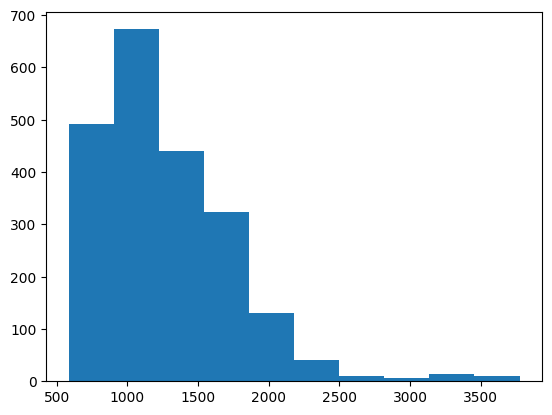

In [37]:
import matplotlib.pyplot as plt

plt.hist(merged_df['precipitation'])

*Obs.:* Distribuição dos dados de precipitação.

(array([2070.,   30.,   10.,    0.,   10.,    0.,    0.,    0.,   10.,
          10.]),
 array([  0. ,  42.4,  84.8, 127.2, 169.6, 212. , 254.4, 296.8, 339.2,
        381.6, 424. ]),
 <BarContainer object of 10 artists>)

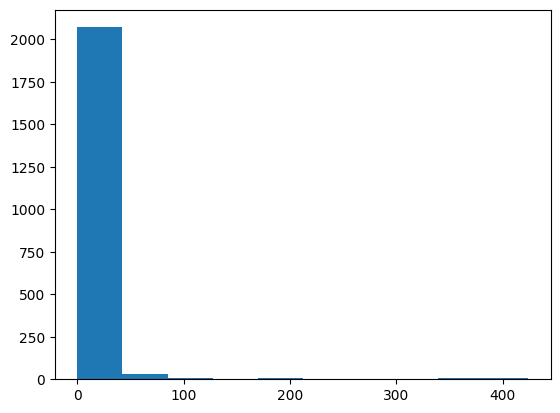

In [38]:
plt.hist(merged_df['fatality_count'])

*Obs.:* Distribuição das mortes em deslizamentos.

(array([  50.,   60.,   10.,   70.,   20.,   70., 1600.,   30.,   50.,
         180.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <BarContainer object of 10 artists>)

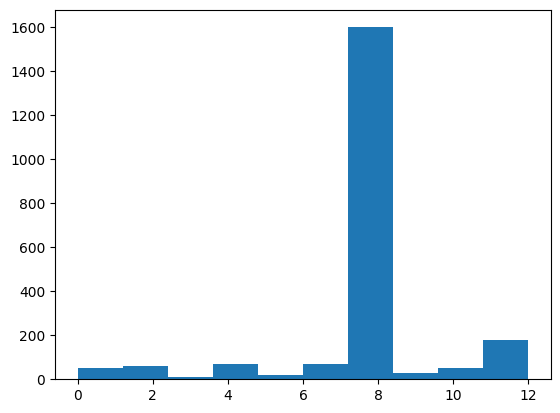

In [39]:
plt.hist(merged_df['state'])

*Obs.:* Distribuição dos eventos por estado. Percebe-se o Rio de Janeiro (*state* = 8) como o estado de maior ocorrência de deslizamentos.

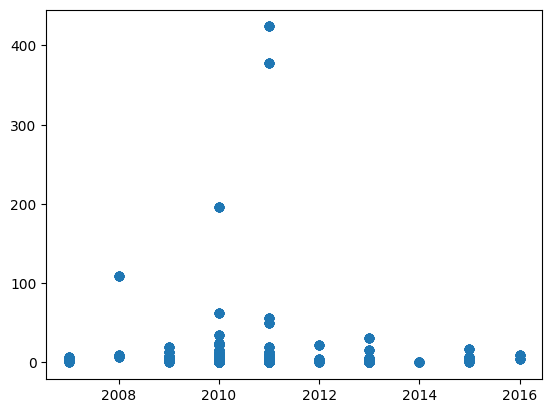

In [40]:
fig = plt.figure()
ax = plt.axes()

x = merged_df['event_date']
y = merged_df['fatality_count']

plt.scatter(x, y)

*Obs.:* Observa-se no gráfico de dispersão acima, a distribuição das mortes em deslizamentos, no período entre 2008 e 2017. Destaca-se o ano de 2010, como o de ocorrência de evento com maior número de mortes.

### Buscando uma correlação entre a precipitação e o número de mortes em um evento.

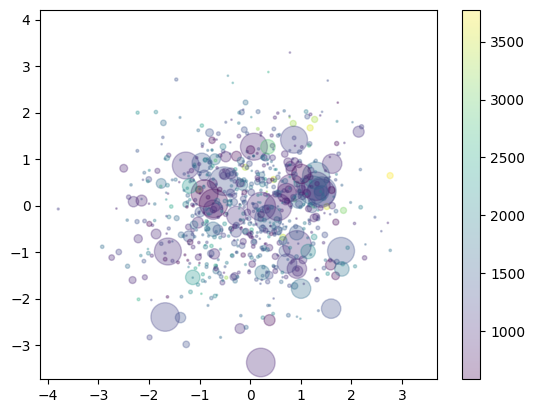

In [41]:
x = np.random.randn(2140)
y = np.random.randn(2140)
sizes = merged_df['fatality_count']
colors = merged_df['precipitation']

plt.scatter(x,y,c = colors, s=sizes, alpha=0.3, cmap='viridis')
#plt.xlabel('')
#plt.ylabel('')
plt.colorbar()

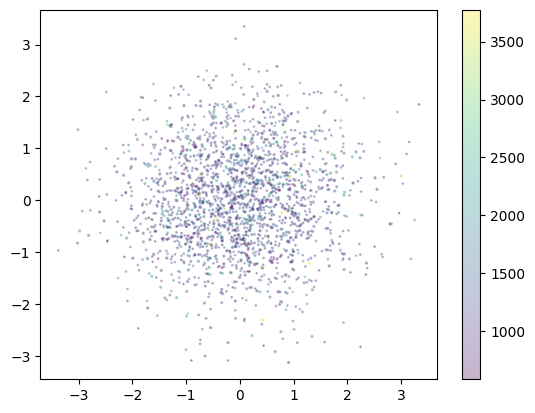

In [42]:
x = np.random.randn(2140)
y = np.random.randn(2140)
sizes = merged_df['landslide_category']
colors = merged_df['precipitation']

plt.scatter(x,y,c = colors, s=sizes, alpha=0.3, cmap='viridis')
#plt.xlabel('')
#plt.ylabel('')
plt.colorbar()

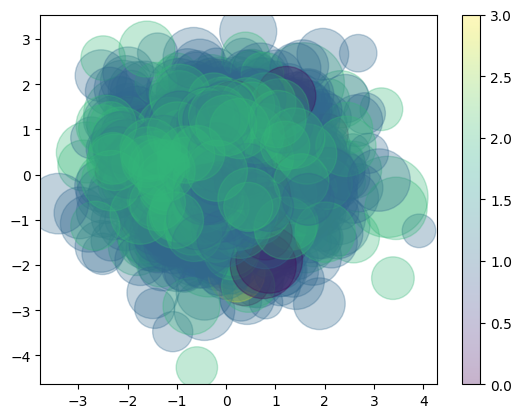

In [43]:
x = np.random.randn(2140)
y = np.random.randn(2140)
colors = merged_df['landslide_category']
sizes = merged_df['precipitation']

plt.scatter(x,y,c = colors, s=sizes, alpha=0.3, cmap='viridis')
#plt.xlabel('')
#plt.ylabel('')
plt.colorbar()

In [44]:
#columns_to_plot = ['landslide_size','precipitation', 'landslide_trigger', 'landslide_category', 'year', 'fatality_count', 'state', 'event_date']
columns_to_plot = ['landslide_size','precipitation', 'landslide_trigger', 'landslide_category', 'fatality_count', 'state']

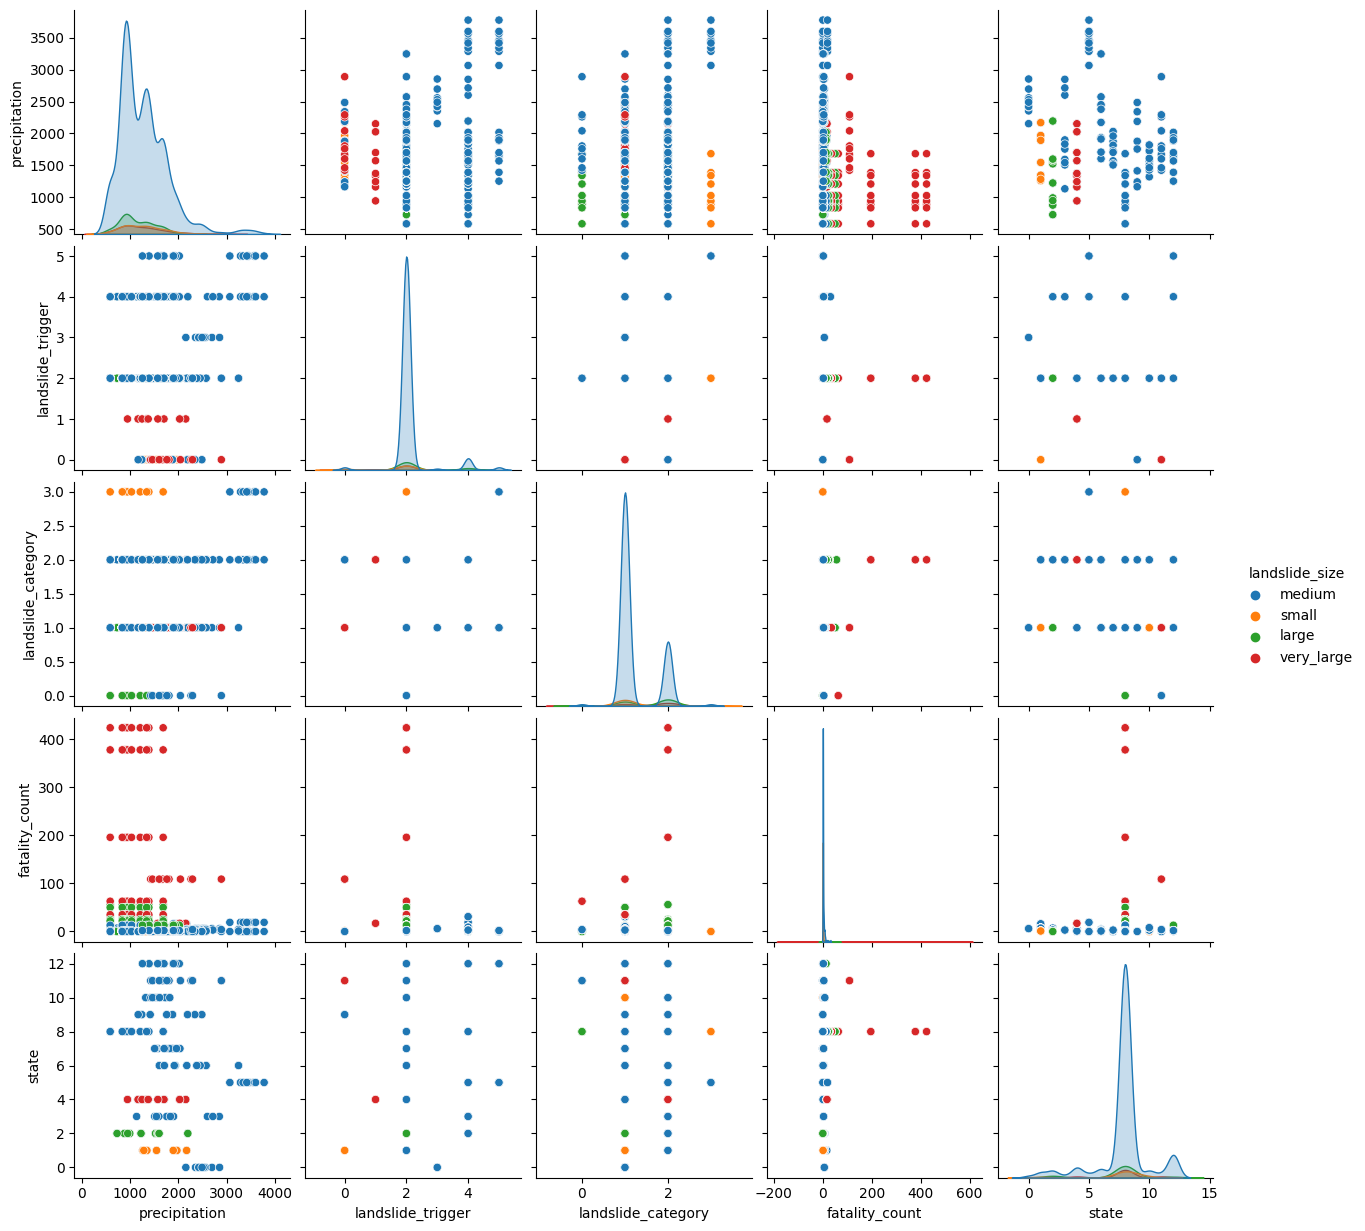

In [45]:
sns.pairplot(merged_df[columns_to_plot],hue='landslide_size')

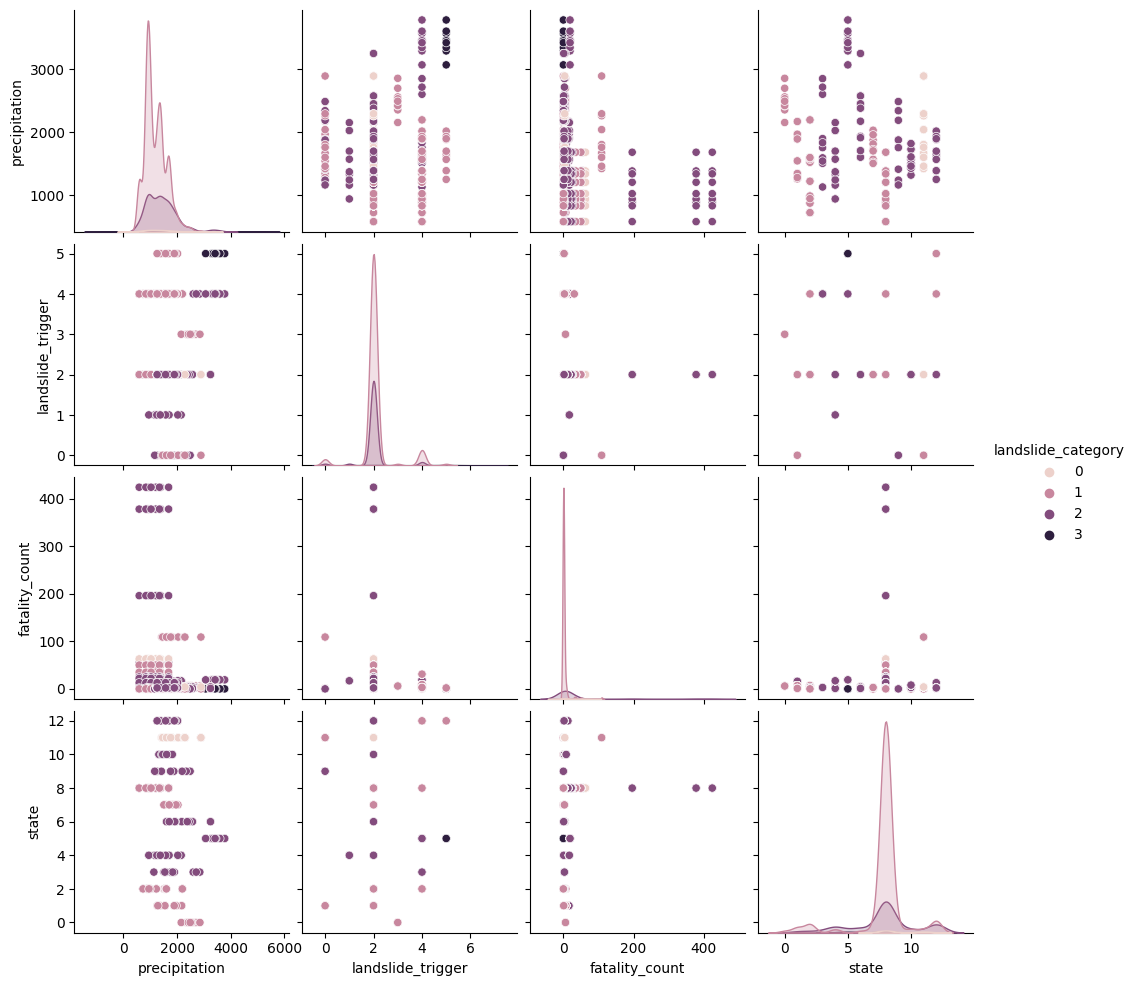

In [46]:
sns.pairplot(merged_df[columns_to_plot],hue='landslide_category')

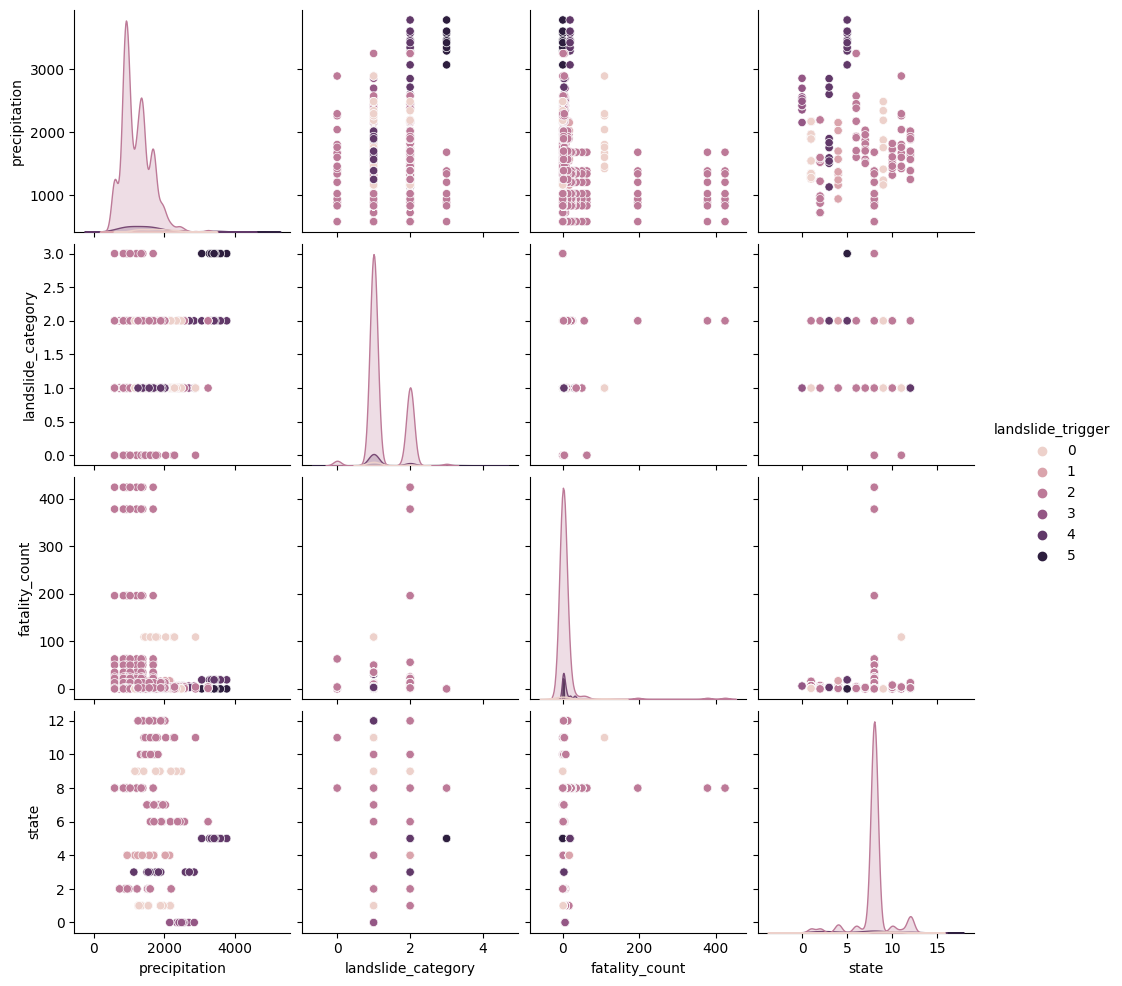

In [47]:
sns.pairplot(merged_df[columns_to_plot],hue='landslide_trigger')

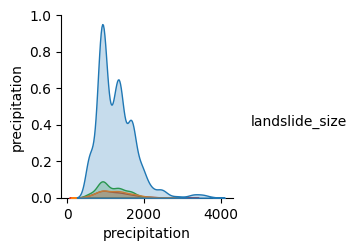

In [48]:
sns.pairplot(merged_df[['landslide_size','precipitation']],hue='landslide_size')

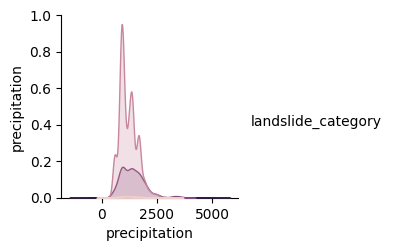

In [49]:
sns.pairplot(merged_df[['landslide_category','precipitation']],hue='landslide_category')

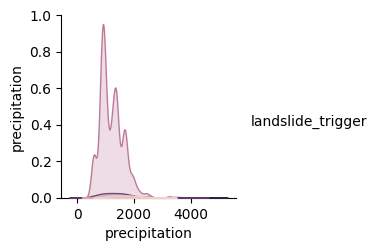

In [50]:
sns.pairplot(merged_df[['landslide_trigger','precipitation']],hue='landslide_trigger')

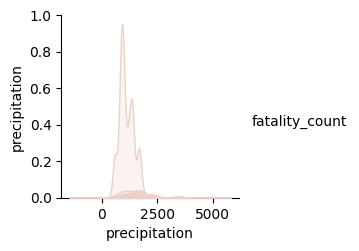

In [51]:
sns.pairplot(merged_df[['fatality_count','precipitation']],hue='fatality_count')

## 5. Treinamento, ajuste fino e teste de modelos de aprendizado de máquina:

Após a análise exploratória e gráfica dos dados, optou-se por utilizar a base de dados para avaliar modelos de classificação para os níveis de deslizamento (*landslide_size*), de forma a ser possível classificar eventos como *medium*, *small*, *large* e *very_large*.

Foram selecionados os principais modelos de classificação: Árvore de Decisão (*DecisionTreeClassifier*), Floresta Aleatória (*RandomForestClassifier*), Máquina de Vetores de Suporte (*Support Vector Machine Classifier - SVC*) e K-Vizinhos Mais Próximos (*KNeighborsClassifier*).

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [53]:
X = merged_df.drop('landslide_size',axis=1)
y = merged_df['landslide_size']

Inicialmente, os modelos são criados com os parâmetros *default* ou com parâmetros iniciais escolhidos aleatoriamente.

In [54]:
clfs = [DecisionTreeClassifier(),
        RandomForestClassifier(max_depth=10),
        SVC(),
        KNeighborsClassifier()]

Para avaliação dos modelos, foi utilizado médoto de *Validação Cruzada (ou Cross-Validation)*, tendo como métrica o *F1-Score*. Como não é uma classificação binária (0/1), porque o atributo de saída possui múltiplas classes, foi necessário utilizar *'f1_macro'* para o parâmetro *scoring*.

In [55]:
from sklearn.model_selection import cross_val_score

classifiers = []
scores = []

for clf in clfs:
    print(f'clf: {clf}')
    cv_scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
    for s in cv_scores:
        print(f'score: {s}')
        classifiers.append(str(clf))
        scores.append(float(s))

clf: DecisionTreeClassifier()
score: 0.49948612538540593
score: 0.44636093073593075
score: 0.7082099531951476
score: 0.6231361231361231
score: 0.4462233169129721
score: 0.6159832015810276
score: 0.6765097100292631
score: 0.5968693284936479
score: 0.7398119122257053
score: 0.4925767324580471
clf: RandomForestClassifier(max_depth=10)
score: 0.4424460957842076
score: 0.494866353957263
score: 0.47349509803921574
score: 0.6231361231361231
score: 0.5618464052287582
score: 0.6188905180840665
score: 0.6765097100292631
score: 0.6190232240437158
score: 0.6074421125997058
score: 0.7126068376068376
clf: SVC()
score: 0.227735368956743
score: 0.227735368956743
score: 0.227735368956743
score: 0.23126614987080105
score: 0.2289002557544757
score: 0.23007712082262208
score: 0.227735368956743
score: 0.227735368956743
score: 0.227735368956743
score: 0.227735368956743
clf: KNeighborsClassifier()
score: 0.2266839378238342
score: 0.2270408163265306
score: 0.23186528497409328
score: 0.5224828375286041
score: 

In [56]:
results = pd.DataFrame({'classifier':classifiers,'F-score':scores})
results

,classifier,F-score
0,DecisionTreeClassifier(),0.499486
1,DecisionTreeClassifier(),0.446361
2,DecisionTreeClassifier(),0.708210
3,DecisionTreeClassifier(),0.623136
4,DecisionTreeClassifier(),0.446223
5,DecisionTreeClassifier(),0.615983
6,DecisionTreeClassifier(),0.676510
7,DecisionTreeClassifier(),0.596869
8,DecisionTreeClassifier(),0.739812
9,DecisionTreeClassifier(),0.492577


<Axes: xlabel='classifier', ylabel='F-score'>

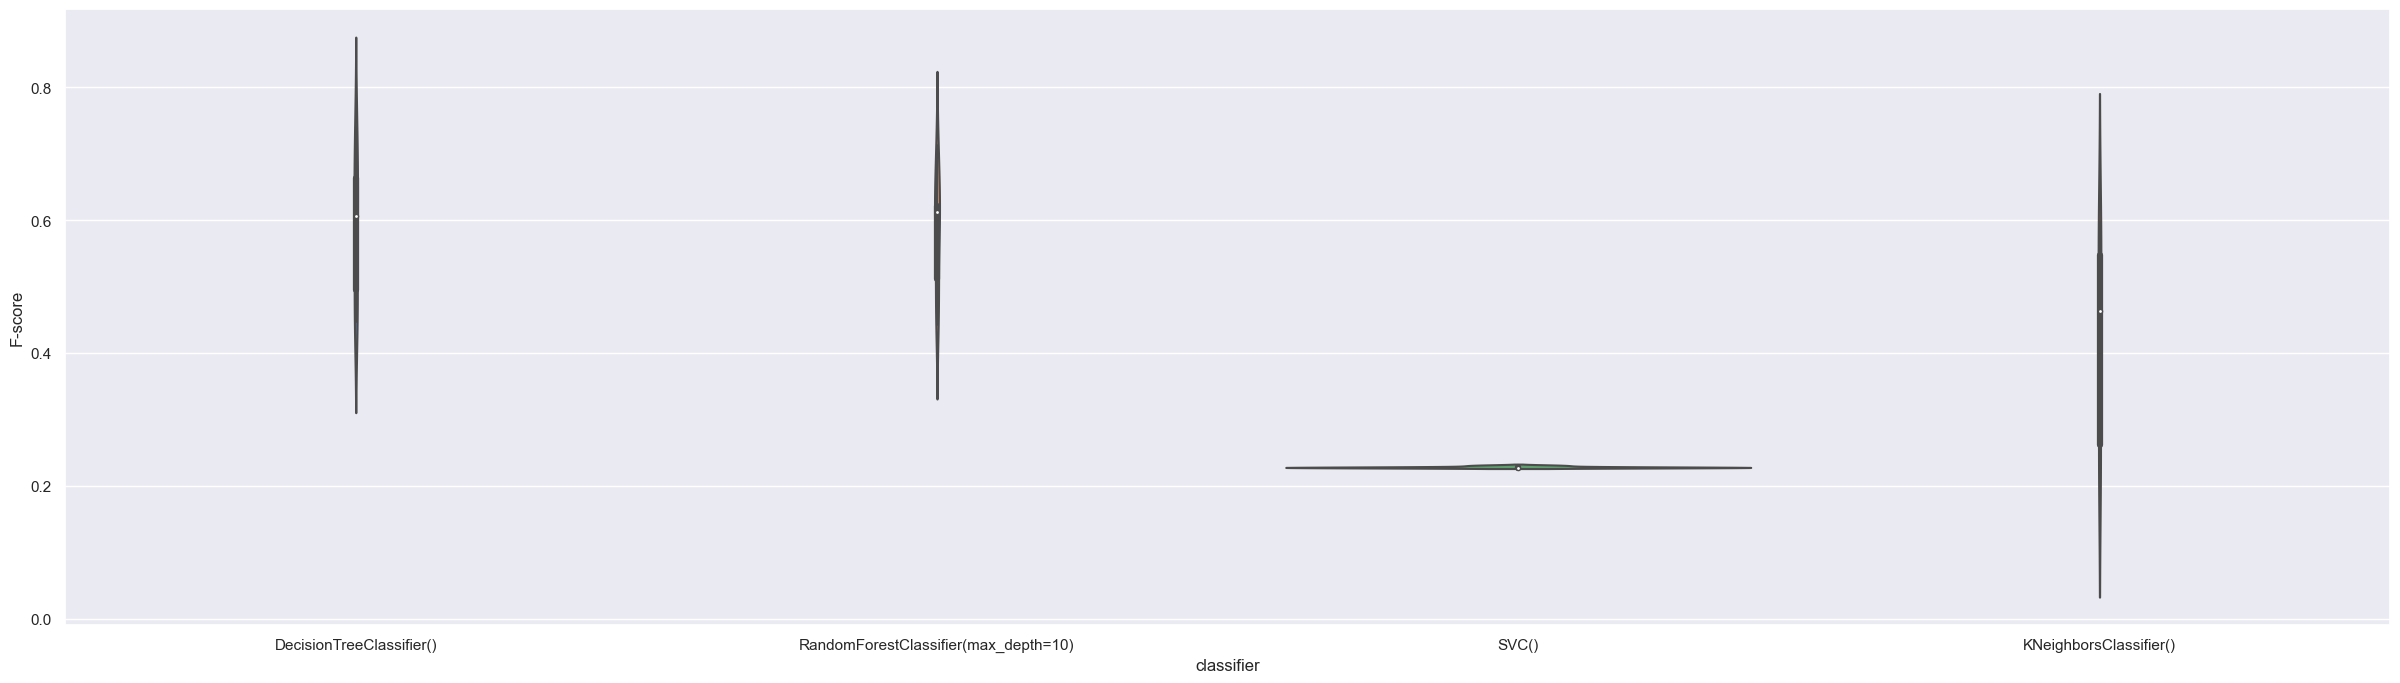

In [57]:
sns.set(rc={'figure.figsize':(30,8)})
#sns.violinplot(data=results,x='classifier',y='F-score')
sns.violinplot(data=results,x='classifier',y='F-score')

*Obs.:* Parece haver algum problema com o 'violinplot'. Por isso, foram gerados boxplots correspondentes.

<Axes: xlabel='classifier', ylabel='F-score'>

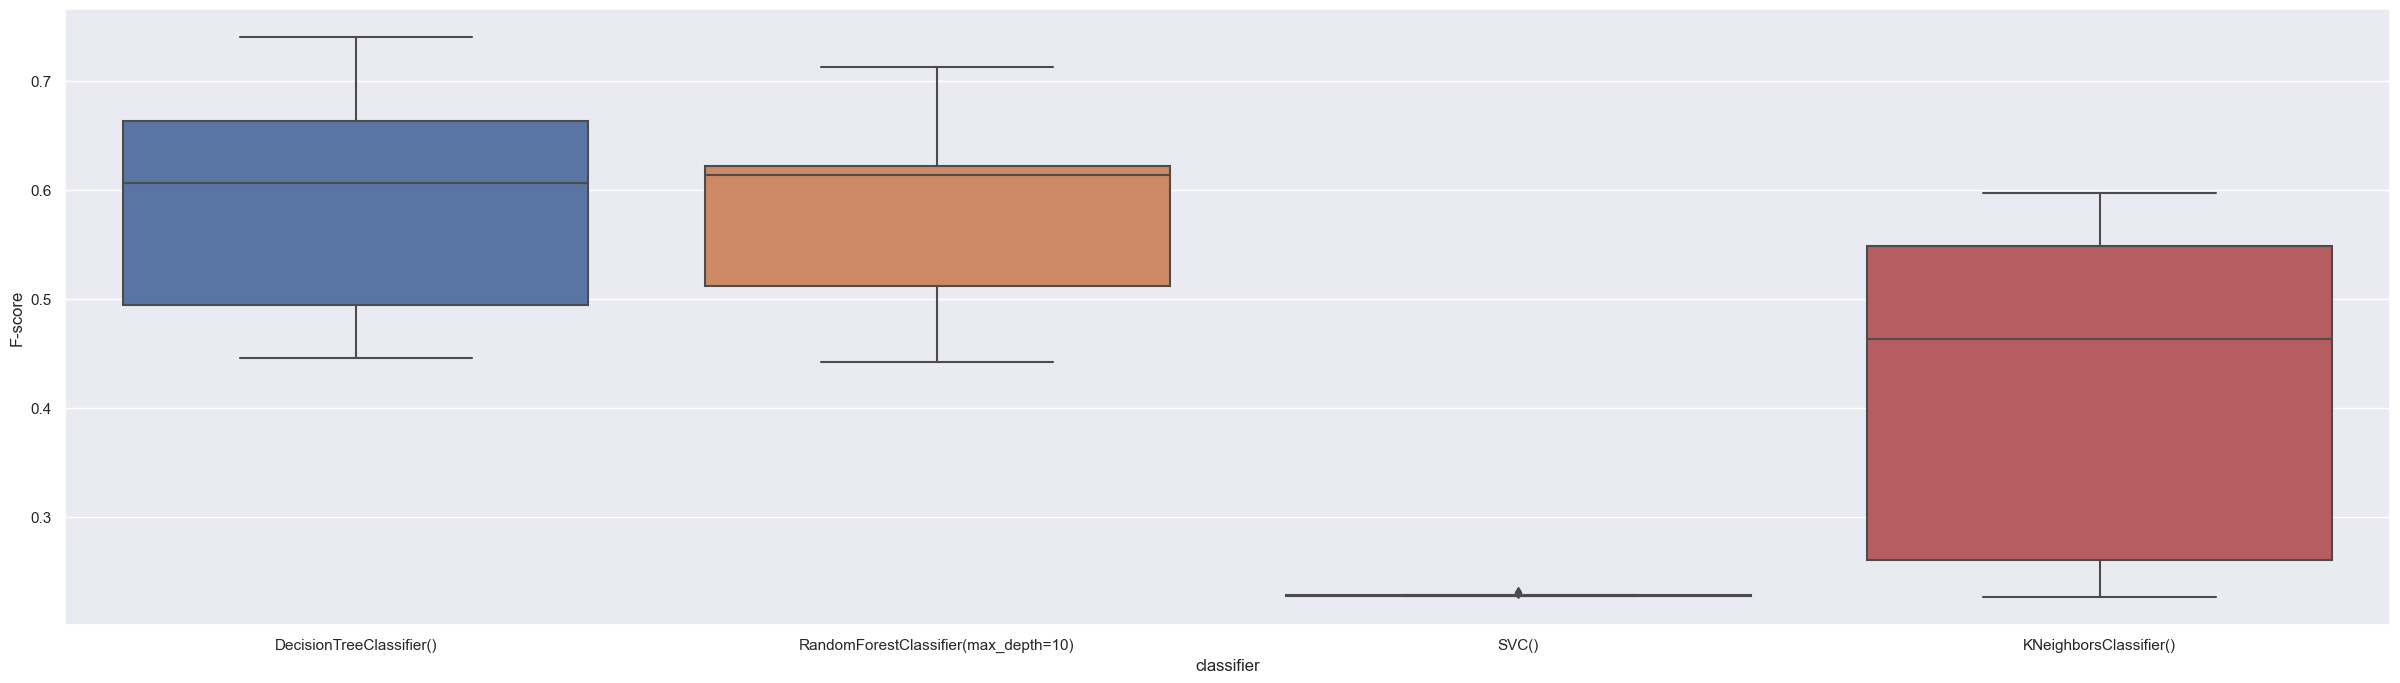

In [58]:
sns.boxplot(data=results,x='classifier',y='F-score')

*Obs.:* A princípio, o método *DecisionTreeClassifier* apresentou melhor desempenho para a classificação do nível de deslizamento. As próximas células utilizam o *GridSearchCV* para tentar obter os melhores parâmetros de ajuste para os modelos.

### Ajuste do DecisionTreeClassifier

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini','entropy','log_loss'],
              'max_depth': [2,3,4,5,6,7,8,9,10],
              'splitter': ['best', 'random']
              }

grid = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10,scoring='f1_macro')
grid.fit(X,y)
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

### Ajuste do RandomForestClassifier

In [60]:
param_grid = {'criterion':['gini','entropy','log_loss'],
              'max_depth':[2,3,4,5,6,7,8,9,10],
              }

grid = GridSearchCV(RandomForestClassifier(),param_grid,cv=10,scoring='f1_macro')
grid.fit(X,y)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10}

#### Ajuste do SVM Classifier
*Observação:* a célula seguinte, referente à busca dos melhores parâmetros para o classificador SVM ficou executando por mais de 40 minutos. A execução foi interrompida e esse classificador não terá seus parâmetros ajustados.

In [61]:
# param_grid = {'kernel':['poly', 'rbf', 'sigmoid'],
#               'degree':[2,3,4,5],
#               'gamma':['scale','auto'],
#               'C':[0.1,0.5,1,1.5,2]}

# grid = GridSearchCV(SVC(),param_grid,cv=10,scoring='f1_macro')
# grid.fit(X,y)
# grid.best_params_

### Ajuste do KNeighborsClassifier

In [62]:
param_grid = {'n_neighbors':[3,4,5],
              'weights':['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute'],      
              }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='f1_macro')
grid.fit(X,y)
grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}

### Rodando novamente os modelos, agora também com parâmetros ajustados.

Após a obtenção dos melhores parâmetros, segundo o *GridSearchCV*, os modelos foram reavaliados.

In [63]:
clfs = [DecisionTreeClassifier(),
        DecisionTreeClassifier(criterion='log_loss', max_depth= 10, splitter='best'),
        RandomForestClassifier(max_depth=5),
        RandomForestClassifier(criterion='log_loss',max_depth=10),
        SVC(),
        KNeighborsClassifier(),
        KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')]

In [64]:
classifiers = []
scores = []

for clf in clfs:
    print(f'clf: {clf}')
    cv_scores = cross_val_score(clf, X, y, cv=10, scoring='f1_macro')
    for s in cv_scores:
        print(f'score: {s}')
        classifiers.append(str(clf))
        scores.append(float(s))

clf: DecisionTreeClassifier()
score: 0.4172032122201399
score: 0.44636093073593075
score: 0.7360335195530726
score: 0.6231361231361231
score: 0.4462233169129721
score: 0.6159832015810276
score: 0.6765097100292631
score: 0.6467478052673583
score: 0.7398119122257053
score: 0.4925767324580471
clf: DecisionTreeClassifier(criterion='log_loss', max_depth=10)
score: 0.4594388033628125
score: 0.4538942695722357
score: 0.7360335195530726
score: 0.6231361231361231
score: 0.5355090311986863
score: 0.6231361231361231
score: 0.6765097100292631
score: 0.6467478052673583
score: 0.41822892133772965
score: 0.6391625615763546
clf: RandomForestClassifier(max_depth=5)
score: 0.46288515406162467
score: 0.4766008860249698
score: 0.4506152849740933
score: 0.5855263157894737
score: 0.5733695652173914
score: 0.5712717728465759
score: 0.7209248818104317
score: 0.6221891534391535
score: 0.6367816091954024
score: 0.7048771121351767
clf: RandomForestClassifier(criterion='log_loss', max_depth=10)
score: 0.573001355

In [65]:
results = pd.DataFrame({'classifier':classifiers,'F-score':scores})
results

,classifier,F-score
0,DecisionTreeClassifier(),0.417203
1,DecisionTreeClassifier(),0.446361
2,DecisionTreeClassifier(),0.736034
3,DecisionTreeClassifier(),0.623136
4,DecisionTreeClassifier(),0.446223
...,...,...
65,"KNeighborsClassifier(algorithm='ball_tree', n_...",0.483401
66,"KNeighborsClassifier(algorithm='ball_tree', n_...",0.540052
67,"KNeighborsClassifier(algorithm='ball_tree', n_...",0.509620
68,"KNeighborsClassifier(algorithm='ball_tree', n_...",0.503135


<Axes: xlabel='classifier', ylabel='F-score'>

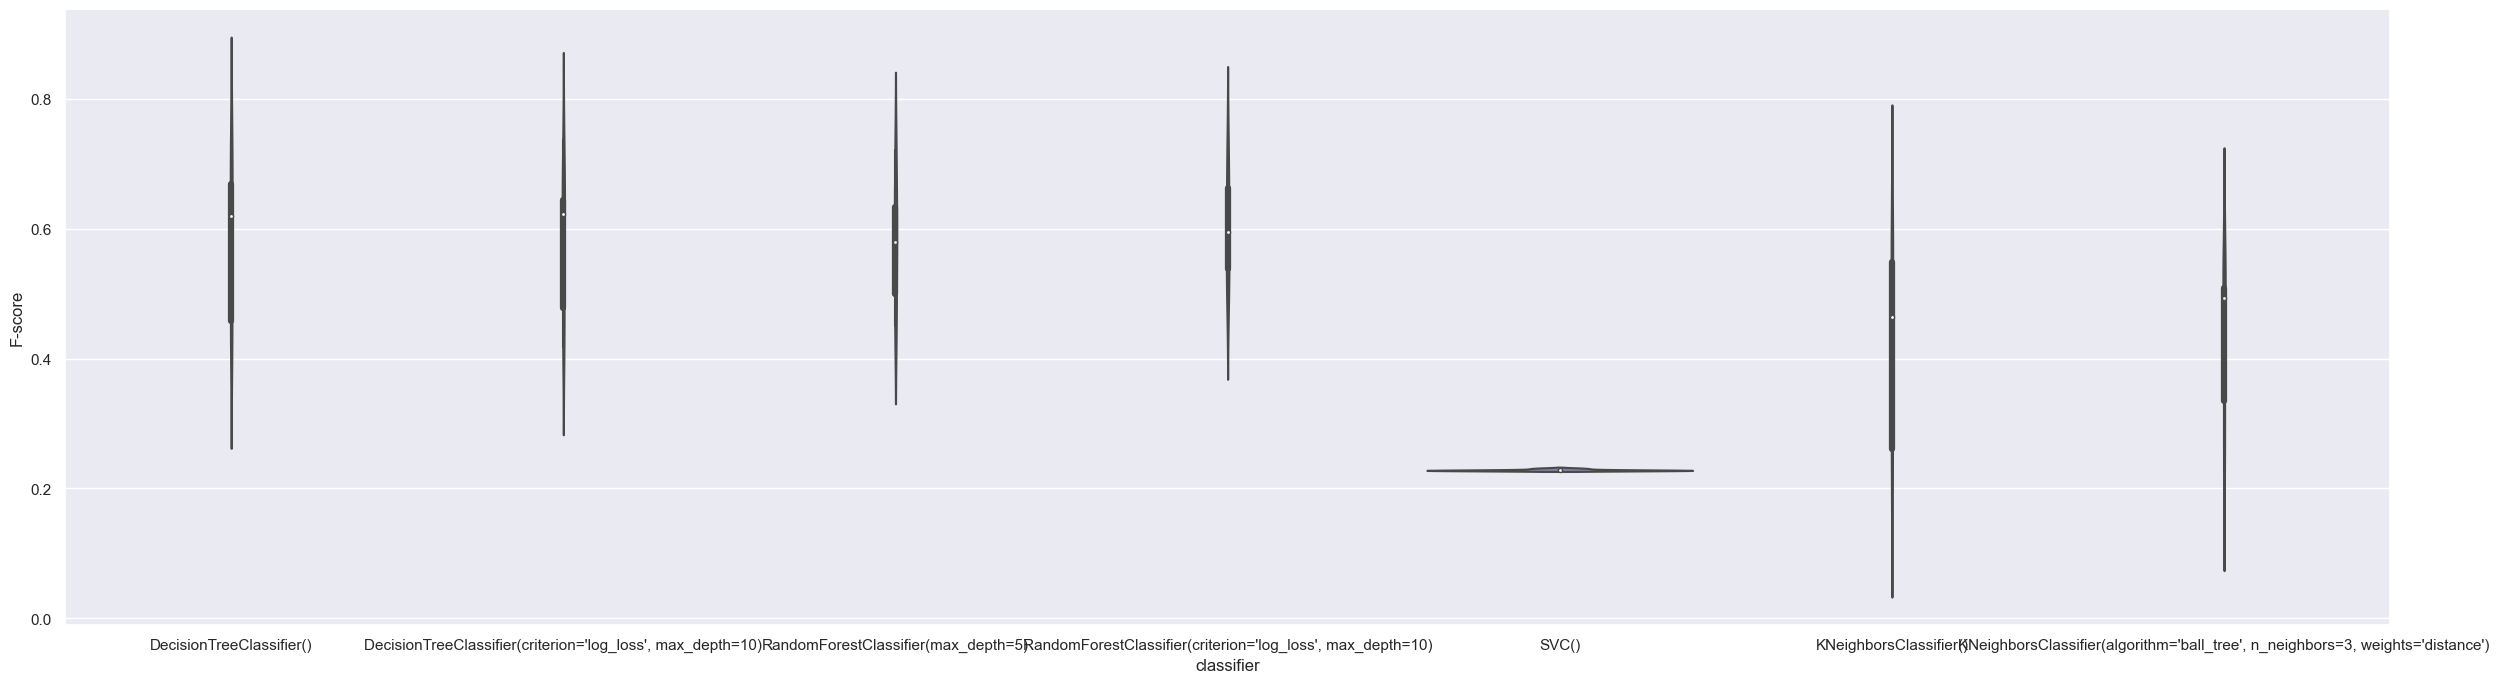

In [66]:
sns.set(rc={'figure.figsize':(30,8)})
#sns.violinplot(data=results,x='classifier',y='F-score')
sns.violinplot(data=results,x='classifier',y='F-score')

<Axes: xlabel='classifier', ylabel='F-score'>

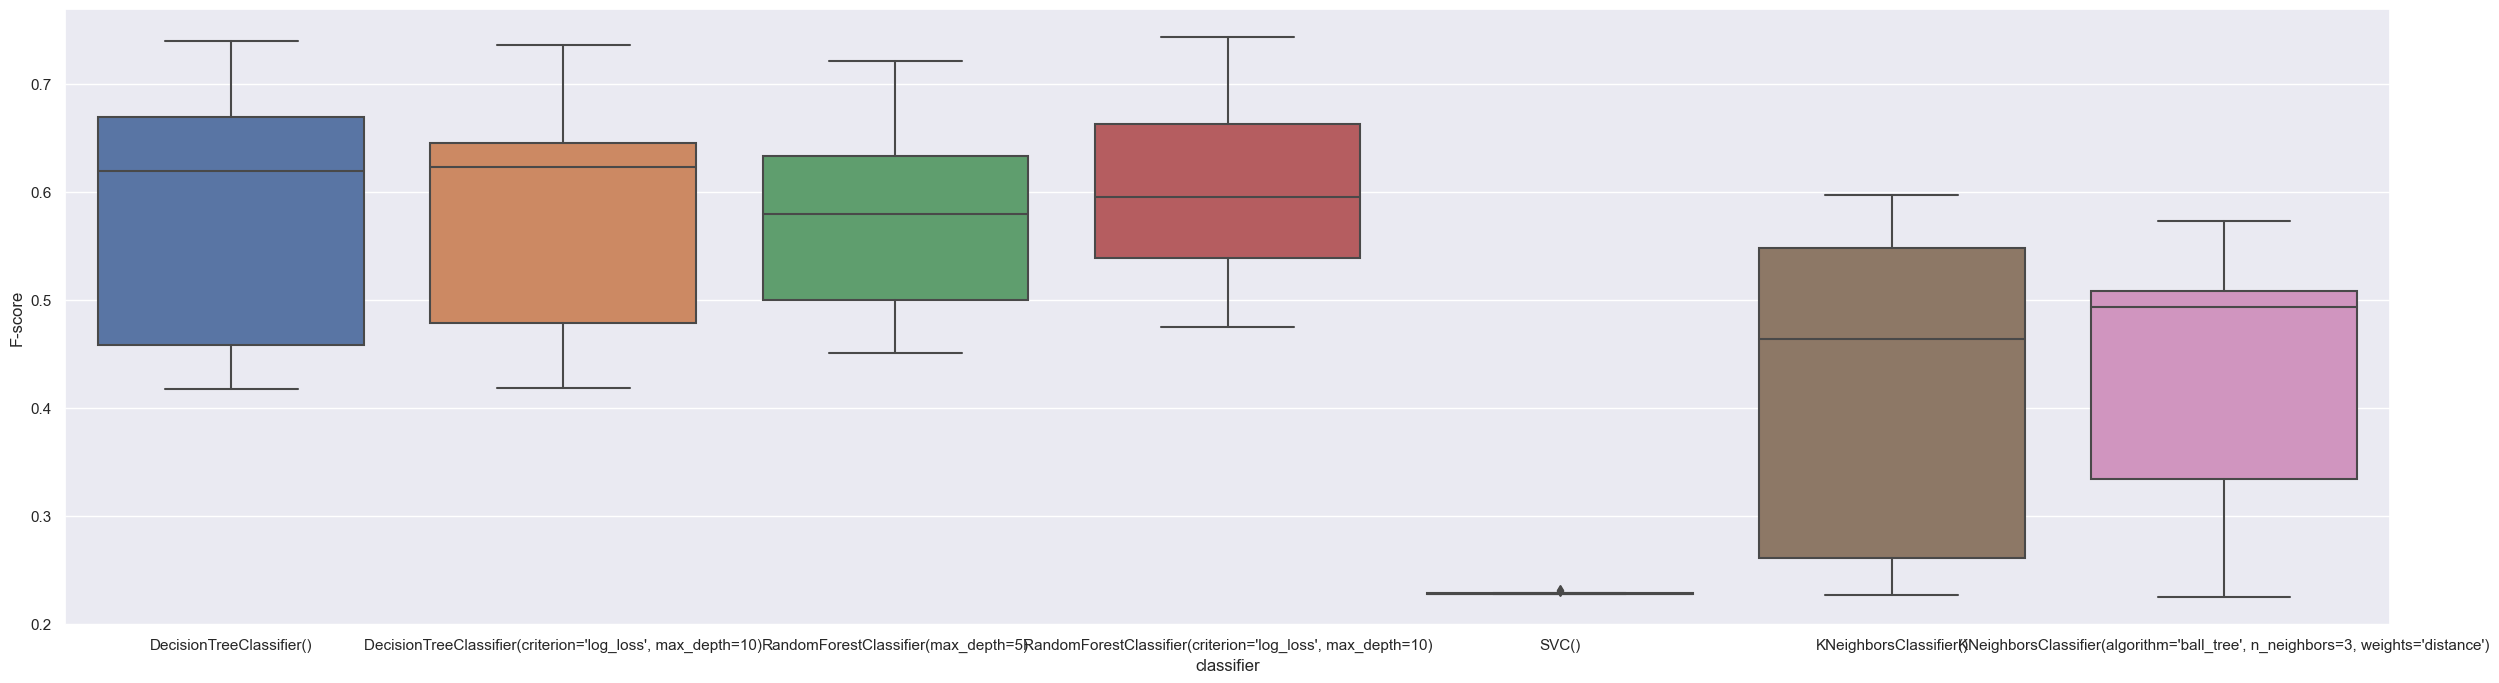

In [67]:
sns.boxplot(data=results,x='classifier',y='F-score')

Desta vez, os modelos *DecisionTreeClassifier* e *DecisionTreeClassifier(criterion='log_loss', max_depth=10)* apresentaram melhor desempenho. A Árvore de Decisão com os parâmetros ajustados será utilizado à frente, para testar dados novos.

In [68]:
X

,landslide_category,landslide_trigger,event_date,fatality_count,location_description,state,year,precipitation
0,1,3,2013,6,160,0,2007,2695.3
1,1,3,2013,6,160,0,2008,2353.3
2,1,3,2013,6,160,0,2009,2508.0
3,1,3,2013,6,160,0,2010,2415.6
4,1,3,2013,6,160,0,2011,2557.7
...,...,...,...,...,...,...,...,...
2135,2,2,2011,2,93,12,2012,1932.7
2136,2,2,2011,2,93,12,2013,1391.3
2137,2,2,2011,2,93,12,2014,1253.3
2138,2,2,2011,2,93,12,2015,1896.8


In [69]:
y

0       medium
1       medium
2       medium
3       medium
4       medium
         ...  
2135    medium
2136    medium
2137    medium
2138    medium
2139    medium
Name: landslide_size, Length: 2140, dtype: object

A seguir, realizam-se as etapas de divisão dos dados entre treinamento e teste e o modelo de Árvore de Decisão com os parâmetros de ajuste é treinado.

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.7)
clfs[1].fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=10)

O modelo treinado apresenta uma acurácia em torno de 99%.

In [71]:
from sklearn.metrics import accuracy_score # Taxa de acerto do modelo

print(f'DecisionTreeClassifier(criterion="log_loss", max_depth=10) accuracy: {accuracy_score(y_test, clfs[1].predict(X_test))}')

DecisionTreeClassifier(criterion="log_loss", max_depth=10) accuracy: 0.9937694704049844


### Testando o modelo de classificação por Árvore de Decisão que, segundo a validação cruzada, parece ser o mais adequado para esta aplicação.

*Verificando as categorias relacionadas ao 'tamanho' ou dimensão do deslizamento, que é o atributo de saída para a classificação.*

In [72]:
merged_df['landslide_size'].unique()

array(['medium', 'small', 'large', 'very_large'], dtype=object)

*Obs.: As classes relacionadas ao tamanho do deslizamento são: 'medium', 'small', 'large' e 'very_large'.*

In [73]:
 # Dado de teste 1 - atributos de entrada: landslide_category, landslide_trigger, event_date, fatality_count, location_description, state, year, precipitation
new_event = [1, 2, 2010, 5, 58, 12, 2010, 2103.3]
clfs[1].predict([new_event])

array(['medium'], dtype=object)

*Para os dados acima, o modelo identificou o evento como da classe de tamanho 'medium'.*

In [74]:
# Dado de teste 2 - atributos de entrada: landslide_category, landslide_trigger, event_date, fatality_count, location_description, state, year, precipitation
new_event = [2, 2, 2010, 22, 141, 8, 2009, 1386.9]
clfs[1].predict([new_event])

array(['large'], dtype=object)

*O evento acima foi classificado como de tamanho 'large'.*

In [75]:
# Dado de teste 3 - atributos de entrada: landslide_category, landslide_trigger, event_date, fatality_count, location_description, state, year, precipitation
new_event = [1, 0, 2008, 109, 68, 11, 2016, 1761.0]
clfs[1].predict([new_event])

array(['very_large'], dtype=object)

*No teste 3, os dados levaram a classificação do evento como de tamnho 'very-large'.*

In [76]:
# Dado de teste 4 - atributos de entrada: landslide_category, landslide_trigger, event_date, fatality_count, location_description, state, year, precipitation
new_event = [2, 3, 2022, 0, 42, 12, 2022, 365.1]
clfs[1].predict([new_event])

array(['small'], dtype=object)

In [77]:
new_event = [2, 3, 2022, 0, 93, 12, 2022, 4365.1] # state = 12 é SP!
clfs[1].predict([new_event])

array(['small'], dtype=object)

*Observa-se, pelos últimos 2 testes, que a quantidade de chuva ('precipitation') não tem tanto impacto na classificação do tamanho do evento. No entanto, como se pode ver nos 2 testes a seguir, a região de ocorrência do evento tem impacto na dimensão do deslizamento, segundo o modelo.* 

In [78]:
new_event = [2, 3, 2022, 1, 93, 12, 2022, 4365.1] # state = 12 é SP!
clfs[1].predict([new_event])

array(['small'], dtype=object)

In [79]:
new_event = [2, 3, 2022, 1, 42, 8, 2022, 4365.1] # state = 8 é RJ!
clfs[1].predict([new_event])

array(['small'], dtype=object)

*Outro atributo de entrada que coerentemente tem impacto na classificação é a quantidade de vítimas fatais ('fatality_count'). Como é possível observar a seguir, à medida que o valor 'fatality_count' aumenta, para um mesmo evento, a classificação pelo modelo vai crescendo em tamanho.*

In [80]:
new_event = [2, 3, 2022, 0, 42, 8, 2022, 2165.1] # state = 8 é RJ!
clfs[1].predict([new_event])

array(['small'], dtype=object)

In [81]:
new_event = [2, 3, 2022, 10, 42, 8, 2022, 2165.1] # state = 8 é RJ!
clfs[1].predict([new_event])

array(['large'], dtype=object)

In [82]:
new_event = [2, 3, 2022, 15, 42, 8, 2022, 2165.1] # state = 8 é RJ!
clfs[1].predict([new_event])

array(['medium'], dtype=object)

In [83]:
new_event = [2, 3, 2022, 17, 42, 8, 2022, 2165.1] # state = 8 é RJ!
clfs[1].predict([new_event])

array(['very_large'], dtype=object)

*Obs.:* Curiosamente, o modelo classificou o evento como *'medium'*, quando o número de mortes foi igual a 15, mas classificou o mesmo evento como *'large'*, quando o número de mortes foi igual a 10. Essa classificação é coerente com a ordem dos valores possíveis do atributo *'landslide_size'* (['medium', 'small', 'large', 'very_large']). Portanto, parece correto.